## Group 4

#### Team members:

Arngrímur Einarsson  
Guðmundur Orri Pálsson  
Nick Geerjens  
Stefán Gunnlaugur Jónsson  
Troy The Legend  



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import math
import copy

In [2]:
data_test = pd.read_excel("HW3Avalidate.xlsx") 
data_train = pd.read_excel("HW3Atrain.xlsx")

X_train = data_train.copy()
X_train = X_train.drop('y', axis=1)
Y_train = data_train.copy()
Y_train = Y_train.drop('X_0', axis=1)
Y_train = Y_train.drop('X_1', axis=1)

X_test = data_test.copy()
X_test = X_test.drop('y', axis=1)
Y_test = data_test.copy()
Y_test = Y_test.drop('X_0', axis=1)
Y_test = Y_test.drop('X_1', axis=1)


x_0_min = min(X_train['X_0'])
x_0_max = max(X_train['X_0'])

x_1_min = min(X_train['X_1'])
x_1_max = max(X_train['X_1'])

for i in range(len(X_train['X_0'])):
    X_train['X_0'][i] = (X_train['X_0'][i]-x_0_min)/(x_0_max-x_0_min) #formula used for Min-Max
    X_train['X_1'][i] = (X_train['X_1'][i]-x_1_min)/(x_1_max-x_1_min) #formula used for Min-Max
    
for i in range(len(X_test['X_0'])):
    X_test['X_0'][i] = (X_test['X_0'][i]-x_0_min)/(x_0_max-x_0_min) #formula used for Min-Max
    X_test['X_1'][i] = (X_test['X_1'][i]-x_1_min)/(x_1_max-x_1_min) #formula used for Min-Max
'''
training_data = []
for i in range(len(X_train['X_0'])):
    training_data.append([round(X_train['X_0'][i], 2),round(X_train['X_1'][i],2)])
    
testing_data = []
for i in range(len(X_test['X_0'])):
    testing_data.append([round(X_test['X_0'][i],2),round(X_test['X_1'][i],2)])

y_train = []

for i in range(len(Y_train['y'])):
    y_train.append([Y_train['y'][i]])
    
y_test = []

for i in range(len(Y_test['y'])):
    y_test.append([Y_test['y'][i]])
'''

training_data = np.empty((0,2), int)
for i in range(len(X_train['X_0'])):
    training_data = np.append(training_data, np.array([[X_train['X_0'][i],X_train['X_1'][i]]]), axis=0)
    
testing_data = np.empty((0,2), int)
for i in range(len(X_test['X_0'])):
    testing_data = np.append(testing_data, np.array([[X_test['X_0'][i],X_test['X_1'][i]]]), axis=0)



y_train = np.empty((0,1), int)
for i in range(len(Y_train['y'])):
    y_train = np.append(y_train, np.array([[Y_train['y'][i]]]), axis=0)

y_test = np.empty((0,1), int)
for i in range(len(Y_test['y'])):
    y_test = np.append(y_test, np.array([[Y_test['y'][i]]]), axis=0)

np_testing_y = np.array(y_test)
np_testing_x = np.array(testing_data)
np_training_x = np.array(training_data)
np_training_y = np.array(y_train)


Training accuracy-iteration: 50.00%
Testing accuracy-iteration: 50.00% Learning rate --> 0.009
Confusion matrix ---> TrueOne: 0 TrueZero: 41 FalseOne: 0 FalseZero 41
MES:  0.5

Training accuracy-iteration: 50.00%
Testing accuracy-iteration: 50.00% Learning rate --> 0.00873
Confusion matrix ---> TrueOne: 0 TrueZero: 41 FalseOne: 0 FalseZero 41
MES:  0.5

Training accuracy-iteration: 50.00%
Testing accuracy-iteration: 50.00% Learning rate --> 0.0084681
Confusion matrix ---> TrueOne: 0 TrueZero: 41 FalseOne: 0 FalseZero 41
MES:  0.5

Training accuracy-iteration: 50.00%
Testing accuracy-iteration: 50.00% Learning rate --> 0.008214056999999999
Confusion matrix ---> TrueOne: 0 TrueZero: 41 FalseOne: 0 FalseZero 41
MES:  0.5

Training accuracy-iteration: 50.00%
Testing accuracy-iteration: 50.00% Learning rate --> 0.007967635289999999
Confusion matrix ---> TrueOne: 0 TrueZero: 41 FalseOne: 0 FalseZero 41
MES:  0.5

MSE has converged!

Average training time for network running 50 iterations wit

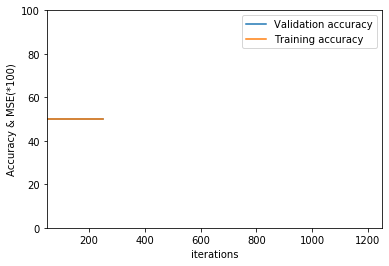

------------------------
Accuracy-best: 50.00% Learning rate --> 0.009
TrueOne: 0 TrueZero: 41 FalseOne: 0 FalseZero 41



In [4]:
class Network_layer:
    
    def __init__(self, number_input, number_neurons, use_standard_activation):
        #self.size = size
        #self.weights = (np.random.rand(number_input,number_neurons)*2) - 1
        #self.weights = np.random.rand(number_input,number_neurons)
        self.weights = np.zeros((number_input,number_neurons))
        self.bias = np.zeros(number_neurons)
        self.last_activation = None
        self.use_standard_activation = use_standard_activation
        self.error = None
        self.delta = None
        
    def activate(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self.activation(r)
            
        return self.last_activation

    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)
    
    def activation(self, x):
        #relu
        if self.use_standard_activation:
            x[x<0] = 0
            return x
        #tanh
        return self.tanh(x)
    
    def activation_derivative(self, x):
        #relu derivative
        if self.use_standard_activation:
            x[x>0] = 1
            x[x<0] = 0
            return x
        #tanh derivative
        return 1.0 - np.tanh(x)**2
    

class Neaural_net:
    layers = []
    
    def __init__(self):
        self.layers = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def feed_forward(self, X):
        for layer in self.layers:
            X = layer.activate(X)
        return X

    def softmax(self,X):
        exps = np.exp(X)
        return exps / np.sum(exps)
    
    def cross_entropy(self, X,y):
        m = y.shape[0]
        p = self.softmax(X)
        
        likelihood = -np.log(p[range(m), y.argmax(axis=1)])
        loss = np.sum(likelihood) / m
        return loss
        
    def logloss(self, true_label, predicted, eps=1e-15):
        p = np.clip(predicted, eps, 1 - eps)
        if true_label == 1:
            return -math.log(p)
        else:
            return -math.log(1 - p) 
        
    def mae(self, targets, predictions):
        differences = predictions - targets
        absolute_differences = np.absolute(differences)
        mean_absolute_differences = absolute_differences.mean()
        return mean_absolute_differences
        
    def mean_squared_error(self, actual, predicted):
        sum_square_error = 0.0
        for i in range(len(actual)):
            sum_square_error += (actual[i] - predicted[i])**2.0
        mean_square_error = sum_square_error / len(actual)

        return mean_square_error
        
    def checkPrediction(self, y, pred):
        pred = np.around(pred)
        if pred == y:
            return 1
        else:
            return 0
               
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        average_activation = None
        correct_predictions = 0
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            all_deltas = []
            last_activations = []
            for j in range(len(output)):
                if layer == self.layers[-1]:
                    layer.error =  y[j] - output[j]
                    all_deltas.append(layer.error * layer.activation_derivative(output[j]))
                    last_activations.append(layer.activation_derivative(output[j]))
                    correct_predictions = correct_predictions + self.checkPrediction(y[j], output[j])
                else:
                    next_layer = self.layers[i + 1]
                    layer.error = np.dot(next_layer.weights, next_layer.delta)
                    all_deltas.append(layer.error * layer.activation_derivative(layer.last_activation[j]))
                    last_activations.append(layer.activation_derivative(layer.last_activation[j]))
                    
            average_delta = sum(all_deltas)/float(len(output))
            average_activation = sum(last_activations)/float(len(output))
            layer.delta = average_delta
    
        # Update the weights
        for j in range(len(output)):
            for i in range(len(self.layers)):
                layer = self.layers[i]
                input_to_use = np.atleast_2d(X[j] if i == 0 else self.layers[i - 1].last_activation[j])
                layer.weights += layer.delta * input_to_use.T * learning_rate
        return correct_predictions
            
    
    
    def get_batch(self, inputs, targets, batchsize, shuffle=False):
        assert len(inputs) == len(targets)
        if shuffle:
            indices = np.random.permutation(len(inputs))
        for start in range(0, len(inputs) - batchsize + 1, batchsize):
            if shuffle:
                excerpt = indices[start:start + batchsize]
            else:
                excerpt = slice(start, start + batchsize)
            yield inputs[excerpt], targets[excerpt] 

            
    def train(self, X, y, learning_rate, max_epochs, batchsize):
        mses = []
        training_accuracy = []
        for i in range(max_epochs):
            correct_per_epoch = 0
            for x_batch,y_batch in self.get_batch(X,y,batchsize=batchsize,shuffle=False):
                correct_predictions_batch = self.backpropagation(x_batch,y_batch, learning_rate)
                correct_per_epoch = correct_per_epoch + correct_predictions_batch

            if i % 100 == 0:
                mse = np.mean(np.square(y - NN.feed_forward(X)))
                mses.append(mse)
                training_accuracy.append((correct_per_epoch/len(X))*100)
        return mses, training_accuracy 
    
    
    
    def test(self, X, y_true):
        correct = 0
        TT = 0 
        TF = 0
        FT = 0
        FF = 0
        mses = []
        forward_passes = []
        y_truth_values = []
        for i in range(len(X)):
            forward_pass = self.feed_forward(X[i])
            forward_passes.append(forward_pass)
            pred = np.around(forward_pass)
            y = y_true[i]
            y_truth_values.append(y)
            if pred == y:
                correct = correct + 1
            if pred == 1 and y == 1:
                TT = TT + 1
            if pred == 1 and y == 0:
                FT = FT + 1
            if pred == 0 and y == 1:
                FF = FF + 1
            if pred == 0 and y == 0:
                TF = TF + 1
            confusion = [TT, TF, FT, FF]
        mse = np.mean(np.square(np.array(y_truth_values) - np.array(forward_passes)))
        mses.append(mse)
        return correct/len(X), confusion, mses

def should_break(last_mse, mses, lowest_mse):
    stop = False
    mse_same = True
    for i in range(len(last_mse)):
        if round(last_mse[i],4) != round(mses[0],4):
            mse_same = False
    if mse_same:
        print("MSE has converged!")
        stop = True
    if round(mses[0], 3) < 0.07:
        print("Error is sufficiently low!")
        stop = True
    if round(mses[0],4) - lowest_mse > 0.05:
        print("MSE increased!")
        stop = True
    return stop





def run_training(NN, learning_rate = 0.009, batchsize = 5, number_test = 25, number_epoc = 50):
    # Train the neural networks
    accuracy = []
    iteration = []
    total_error = []
    total_mses = []
    total_training_accuracy = []
    last_mse = [0,0,0,0,0]
    a = 0
    total_time = 0
    max_accuracy = 0
    best_NN = copy.copy(NN)
    best_confusion = [0,0,0,0]
    best_learning_rate = learning_rate
    recall = []
    precision = []
    lowest_mse = 100
    
    for i in range(1,number_test+1):
        start = time.time()
        errors, training_accuracy = NN.train(np_training_x, np_training_y, learning_rate, number_epoc, batchsize)
        end = time.time()
        total_time = total_time + (end-start)
        total_error.append(errors)
        total_training_accuracy.append(training_accuracy)
        iteration.append(i*number_epoc)
        accuracy_one, confusion, mses = NN.test(np_testing_x, np_testing_y)
        total_mses.append(mses)
        last_mse[a] = round(mses[0],4)
        a = a + 1
        if a > 4:
            a = 0

        if(accuracy_one > max_accuracy):
            max_accuracy = copy.copy(accuracy_one)
            best_NN = copy.deepcopy(NN)
            best_confusion = copy.copy(confusion)
            best_learning_rate = copy.copy(learning_rate)
        if mses[0] < lowest_mse:
            lowest_mse = mses[0]
        print('Training accuracy-iteration: %.2f%%' % (training_accuracy[-1]))
        print('Testing accuracy-iteration: %.2f%%' % (accuracy_one*100), "Learning rate --> "+ str(learning_rate))
        print('Confusion matrix ---> TrueOne:',confusion[0] ,'TrueZero:',confusion[1], 'FalseOne:',confusion[2] , 'FalseZero',confusion[3] )
        print("MES: ", mses[0])
        print()
        #recall_tmp = round(confusion[0]/(confusion[0]+confusion[3]), 2)
        #precision_tmp = round(confusion[0]/(confusion[0]+confusion[2]), 2)
        #recall.append(recall_tmp)
        #print('Recall=', recall_tmp)
        #precision.append(precision_tmp)
        #print('Precision=', precision_tmp)
        accuracy.append(accuracy_one*100)
        if should_break(last_mse, mses, lowest_mse):
            break;
        learning_rate = learning_rate*0.97
        
    print()
    print("Average training time for network running " + str(number_epoc) + " iterations with batch size " + str(batchsize) + " --->" + str(total_time/number_test)+ "s")
    plt.plot(iteration,accuracy, label='Validation accuracy')
    #plt.plot(iteration, total_error, label='Mean squared error for training set')
    #plt.plot(iteration, total_mses, label='Mean squared error for validation set')
    plt.plot(iteration, total_training_accuracy, label='Training accuracy')
    #plt.plot(iteration, recall, label='Recall')
    #plt.plot(iteration, precision, label='Precision')
    plt.xlabel('iterations')
    plt.ylabel('Accuracy & MSE(*100)')
    plt.axis((number_epoc,number_epoc*number_test,0,100))
    plt.title('')
    plt.legend(loc='best')
    plt.show()


    accuracy_one, confusion, mses = best_NN.test(np_testing_x, np_testing_y)
    print("------------------------")
    print('Accuracy-best: %.2f%%' % (accuracy_one*100), "Learning rate --> "+ str(best_learning_rate))
    print('TrueOne:',confusion[0] ,'TrueZero:',confusion[1], 'FalseOne:',confusion[2] , 'FalseZero',confusion[3] )
    print()

    


def init_net(hidden_layers):
    NN = Neaural_net()
    NN.add_layer(Network_layer(2, 10, False))
    for i in range(hidden_layers - 1):
        NN.add_layer(Network_layer(10, 10, False))
    NN.add_layer(Network_layer(10,1, False))
    return NN


NN = init_net(2)
run_training(NN)



## 1. (10 points) Parameter initialization. 

Choose the best performing model from HW3A in termsof classification accuracy. For this model, initialize all its parameters (connection weights and biases) to zero and retrain it using all the other settings from HW3A. Report the performance (e.g.loss function over training epochs, classication accuracy and confusion matrix on the validation set after training) of this new trained model. Do you observe any interesting behavior for this
new trained model? Discuss the performance of this new trained model in comparison with the
performance of the best model from HW3A.

Our accuracy is stuck at $50\%$ when the weights and bias are initialized to zero. In each iteration of the backpropigation, we update the weights by multiplying the existing weight by a delta determined by backpropagation. If the initial weights value are zeros, multiplying it by any value for delta won't change the weight which means each iteration has no effect on the weights you're trying to optimize. 

## 2. (10 points) Learning rate vs parameter initialization. 

Retrain several times for the same fixed amount of epochs (e.g. 100 - this value is your choice) the best model from HW3A using exactly the same settings as in HW3A, with the exception of the learning rate and the initialization of the connection weights and biases which have to be different for each retraining. Start with a very small learning rate (e.g. 0:0001) and after that gradually increase it (e.g. next values can be
:001, 0:01, ...). Initialize the connection weights and biases by sampling from a normal distribution
$N(0, \sigma^2)$ has to take the following values $\{0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1\}$. Make a heatmap where the x-axis represents $\sigma^2$, the y-axis represents the learning rate, while the colors
represent the accuracy obtained on the validation set after each training. Each element in the
heatmap matrix represents practically the accuracy obtained with a specific learning rate and a
specific initialization. Discuss the heatmap results.

We started with the learning rate as 0.009 and after each test the learning rate was reduced by 1%. We tried various batch sizes, what worked best was relatively small batch sizes so we ended using 
$$batchsize=5$$
We initialized our weights as a random number from 0 to 1 and our biases as 0. We read that it is best to initialize biases as zero, it also didn´t give good results when we tried random to initilaze the biases. We knew that using random initialization for the weights is better than using zeroes. We tried some other initilizations such as from 0 to 0.5 or -0.5 to 0.5.

## 3. (10 points) Training. 
Make plots with the loss function computed over the training set and over the validation set. Stop the training when the error is small enough. Justify your stopping criterium. Report the final accuracy obtained and the confusion matrix on the validation dataset.

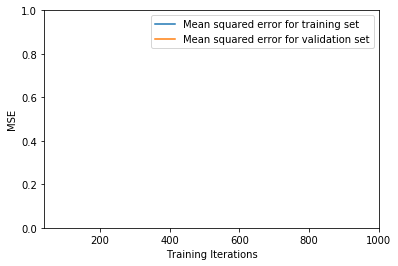

In [117]:
plt.plot(iteration, total_error, label='Mean squared error for training set')
plt.plot(iteration, total_mses, label='Mean squared error for validation set')
plt.xlabel('Training Iterations')
plt.ylabel('MSE')
plt.axis((number_epoc,number_epoc*number_test,0,1))
plt.title('')
plt.legend(loc='best')
plt.show()

The training stops if any of the following three events occure.
    i) The mean square error drops below 0.07.
    ii) The mean square error drastically increases that is MSE_new - MSE_last > 0.05.
    iii) The mean square error converges and doesn´t change for 5 rounds.

We get the final confusion matrix: $$\text{Confusion} = \begin{bmatrix} \text{True One} & \text{True Zero} \\ \text{False One} & \text{False Zero} \end{bmatrix} = \begin{bmatrix} 39&36\\5&2\end{bmatrix}$$

The final accuracy is: $$\text{Accuracy} = 91.46\%$$

## 4. (20 points) Implementation. 
We will run and check the uploaded Python file. To obtain the points for this subproblem, the Python file has to run (no errors) and the MLP model and the Backpropagation algorithm have to be implemented completely from scratch by you. You are not allowed to use any library which implements MLP models, but you are allowed to use auxiliary libraries, e.g. Numpy, Matplotlib, Pandas.

Code is above.

## II. Peer Review paragraph (0 points)
Finally, each group member must write a single paragraph outlining their opinion on the work distri- bution within the group. Did every group member contribute equally? Did you split up tasks in a fair manner, or jointly worked through the exercises. Do you think that some members of your group deserve a different grade from others?